*Họ và tên: Nguyễn Hà Chí Tôn*

*MSSV: 2351060037*


**Đề bài:**

Tập tin PenDigits-TrainTest.csv (khoảng 10000 dữ lieu) và PenDigits-Predict.csv (khoảng 1000 dữ lieu) chứa thông tin đặc điểm các ký số từ 0..9

1. Dùng tập tin PenDigits-TrainTest.csv để xây dựng mô hình phân lớp bằng thuật  toán Knn. Sử dung phương pháp huấn luyện K cross validation với K=10. Anh chị thay đổi các tham số của mô hình (số láng giềng gần nhất, độ đo khoảng cách,...) nhiều lần, quan sát các  kết quả trong mỗi lần thay đổi. Sau đó chọn ra 3 mô hình mà anh chị cho là tốt nhất.

2. Thử nghiệm dự báo phân  lớp từng mô hình trong 3 mô hình mà anh chị đã chọn với tập tin PenDigits-Predict.csv và ghi nhận các kết quả.

3. Tổng hợp kết quả của câu 1 và 3 trong 1 bảng đánh giá, nhận xét.
 


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv(r"Pendigits-TrainTest.csv")
print(f"Số lượng mẫu: {len(df)}")
print(f"Số đặc trưng: {df.shape[1] - 1}")
df.head()

Số lượng mẫu: 10003
Số đặc trưng: 16


,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,100,100,55,100,13,76,0,46,12,15,64,0,78,27,26,46,6
1,34,71,16,65,17,23,0,0,1,42,44,75,100,100,46,91,8
2,34,29,0,51,37,76,92,100,100,80,84,53,74,26,74,0,1
3,38,79,59,100,89,77,69,44,31,17,0,22,54,20,100,0,2
4,100,100,60,89,26,65,3,36,0,4,43,0,51,26,12,31,6


*Tách dữ liệu*

In [42]:
X = df.drop('class', axis=1)
y = df['class']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("\nPhân bố các lớp:")
print(y.value_counts().sort_index())

X shape: (10003, 16)
y shape: (10003,)

Phân bố các lớp:
class
0    1039
1    1041
2    1031
3     953
4    1051
5     943
6     964
7    1054
8     950
9     977
Name: count, dtype: int64


*Chuẩn hóa dữ liệu.*

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Đã chuẩn hóa dữ liệu!")

Đã chuẩn hóa dữ liệu!


*Thử nghiệm nhiều giá trị k với 10-Fold Cross Validation*

In [44]:
for k in range(1, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10)
    print(f"k={k}: Accuracy = {scores.mean():.4f} (+/- {scores.std():.4f})")

k=1: Accuracy = 0.9938 (+/- 0.0026)
k=3: Accuracy = 0.9935 (+/- 0.0025)
k=5: Accuracy = 0.9922 (+/- 0.0026)
k=7: Accuracy = 0.9912 (+/- 0.0023)
k=9: Accuracy = 0.9902 (+/- 0.0024)
k=11: Accuracy = 0.9891 (+/- 0.0027)
k=13: Accuracy = 0.9880 (+/- 0.0032)
k=15: Accuracy = 0.9876 (+/- 0.0037)
k=17: Accuracy = 0.9865 (+/- 0.0029)
k=19: Accuracy = 0.9849 (+/- 0.0048)
k=21: Accuracy = 0.9845 (+/- 0.0048)


*Biểu đồ biến thiên k*

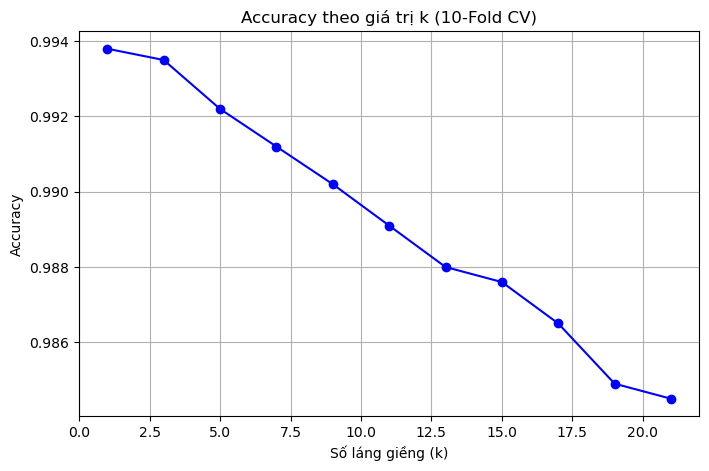

In [50]:

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracies = [0.9938, 0.9935, 0.9922, 0.9912, 0.9902, 0.9891, 0.9880, 0.9876, 0.9865, 0.9849, 0.9845]

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.xlabel('Số láng giềng (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy theo giá trị k (10-Fold CV)')
plt.grid(True)
plt.show()


*Thử nghiệm độ đo khoảng cách*

In [ ]:
print("So sánh độ đo khoảng cách (k=3):")
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    scores = cross_val_score(knn, X_scaled, y, cv=10)
    print(f"{metric}: Accuracy = {scores.mean():.4f}") 

So sánh độ đo khoảng cách (k=3):
euclidean: Accuracy = 0.9935
manhattan: Accuracy = 0.9925


## Chọn 3 mô hình tốt nhất:

| Mô hình | k | Accuracy (CV) | Std |
|---------|---|---------------|-----|
| Mô hình 1 | k=1 | 99.38% | 0.0026 |
| Mô hình 2 | k=3 | 99.35% | 0.0025 |
| Mô hình 3 | k=5 | 99.22% | 0.0026 |

**Nhận xét:** k càng nhỏ thì accuracy càng cao. Cả 3 mô hình đều có accuracy trên 99%. 

**Câu 2.** Dự báo trên tập PenDigits-Predict.csv

In [45]:
predict_df = pd.read_csv(r"Pendigits-Predict.csv")
X_predict = predict_df.drop('class', axis=1)
y_true = predict_df['class']
X_predict_scaled = scaler.transform(X_predict)
print(f"Số mẫu: {len(X_predict)}") 

Số mẫu: 989


In [46]:
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    y_pred = knn.predict(X_predict_scaled)
    acc = accuracy_score(y_true, y_pred)
    print(f"Mô hình k={k}: Accuracy = {acc:.4f}")


Mô hình k=1: Accuracy = 0.9919
Mô hình k=3: Accuracy = 0.9929
Mô hình k=5: Accuracy = 0.9929


**Câu 3.** Bảng tổng hợp kết quả

## Bảng đánh giá:

| Mô hình | k | Accuracy (10-Fold CV) | Accuracy (Predict) |
|---------|---|----------------------|-------------------|
| Mô hình 1 | k=1 | 99.38% | 99.19% |
| Mô hình 2 | k=3 | 99.35% | 99.29% |
| Mô hình 3 | k=5 | 99.22% | 99.29% |

## Nhận xét:

1. **Accuracy rất cao**: Cả 3 mô hình đều đạt accuracy trên 99% trên cả tập huấn luyện (CV) và tập dự báo.

2. **k=3 và k=5 dự báo tốt hơn k=1**: Mặc dù k=1 có accuracy cao nhất khi CV (99.38%), nhưng khi dự báo trên tập mới thì k=3 và k=5 lại tốt hơn (99.29% so với 99.19%). Điều này cho thấy k=1 có thể bị overfitting nhẹ.

3. **Mô hình tối ưu**: k=3 hoặc k=5 là lựa chọn tốt nhất vì vừa có accuracy cao, vừa ổn định khi dự báo dữ liệu mới.

4. **Kết luận**: Thuật toán KNN hoạt động rất tốt với bộ dữ liệu PenDigits, đạt độ chính xác gần 99.3% trong việc nhận dạng các chữ số từ 0-9.

5. **Độ đo khoảng cách**: Euclidean (99.35%) cho kết quả tốt hơn Manhattan (99.25%) với k=3. Vì vậy giữ nguyên metric mặc định (euclidean) là hợp lý.